Grzegorz Walkosz
Independent Study report

Below is a few of the topics and reading which we worked on. The main goal was to find the most optimal way to map and scheudle tasks to a 2d mesh. We stopped at trying to create an algorithm which uses a combination of simulated annealing and ant colony.

# Ant colony optimization

simulated 'ants' similarly record their positions and the quality of their solutions, so that in later simulation iterations more ants locate better solutions.


the optimization problem needs to be converted into the problem of finding
the shortest path on a weighted graph.

In the first step of each iteration, each ant stochastically constructs
a solution, i.e. the order in which the edges in the graph should be followed.
In the second step, the paths found by the different ants are compared.
The last step consists of updating the pheromone levels on each edge.

procedure ACO_MetaHeuristic is

    while not terminated do
    
        generateSolutions()
        
        daemonActions()
        
        pheromoneUpdate()
        
    repeat
    
end procedure

job scheduling:
https://github.com/BrenoCPimenta/Ant-Colony-Optimization

traveling salesmen:
https://www.kaggle.com/code/jamesmcguigan/ant-colony-optimization-algorithm/notebook

Example:
https://github.com/Akavall/AntColonyOptimization

In [1]:
import pandas as pd
import random as rd
from itertools import combinations
import math
import random as rn
import numpy as np
from numpy.random import choice as np_choice

class AntColony(object):

    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        """
        Args:
            distances (2D numpy.array): Square matrix of distances. Diagonal is assumed to be np.inf.
            n_ants (int): Number of ants running per iteration
            n_best (int): Number of best ants who deposit pheromone
            n_iteration (int): Number of iterations
            decay (float): Rate it which pheromone decays. The pheromone value is multiplied by decay, so 0.95 will lead to decay, 0.5 to much faster decay.
            alpha (int or float): exponenet on pheromone, higher alpha gives pheromone more weight. Default=1
            beta (int or float): exponent on distance, higher beta give distance more weight. Default=1
        Example:
            ant_colony = AntColony(german_distances, 100, 20, 2000, 0.95, alpha=1, beta=2)          
        """
        self.distances  = distances
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheronome(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            print (shortest_path)
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path            
            self.pheromone = self.pheromone * self.decay            
        return all_time_shortest_path

    def spread_pheronome(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in path:
                self.pheromone[move] += 1.0 / self.distances[move]

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele]
        return total_dist

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        path.append((prev, start)) # going back to where we started    
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0

        row = pheromone ** self.alpha * (( 1.0 / dist) ** self.beta)

        norm_row = row / row.sum()
        move = np_choice(self.all_inds, 1, p=norm_row)[0]
        return move

In [2]:
distances = np.array([[np.inf, 2, 2, 5, 7],
                      [2, np.inf, 4, 8, 2],
                      [2, 4, np.inf, 1, 3],
                      [5, 8, 1, np.inf, 2],
                      [7, 2, 3, 2, np.inf]])

ant_colony = AntColony(distances, 1, 1, 100, 0.95, alpha=1, beta=1)
shortest_path = ant_colony.run()
print ("shorted_path: {}".format(shortest_path))

([(0, 4), (4, 2), (2, 3), (3, 1), (1, 0)], 21.0)
([(0, 2), (2, 3), (3, 1), (1, 4), (4, 0)], 20.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 1), (1, 3), (3, 4), (4, 2), (2, 0)], 17.0)
([(0, 1), (1, 4), (4, 2), (2, 3), (3, 0)], 13.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 1), (1, 4), (4, 2), (2, 3), (3, 0)], 13.0)
([(0, 4), (4, 1), (1, 3), (3, 2), (2, 0)], 20.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 2), (2, 3), (3, 4), (4, 1), 

# Tabu search

First, at each step worsening moves can be accepted if no improving move is available (like when the search is stuck at a strict local minimum). In addition, prohibitions (henceforth the term tabu) are introduced to discourage the search from coming back to previously-visited solutions.

search uses memory structures that describe the visited solutions or user-provided sets of rules. If a potential solution has been previously visited within a certain short-term period or if it has violated a rule, it is marked as "tabu" (forbidden) so that the algorithm does not consider that possibility repeatedly.

Memory types:

Short-term: The list of solutions recently considered. If a potential solution appears on the tabu list, it cannot be revisited until it reaches an expiration point.

Intermediate-term: Intensification rules intended to bias the search towards promising areas of the search space.

Long-term: Diversification rules that drive the search into new regions (i.e. regarding resets when the search becomes stuck in a plateau or a suboptimal dead-end).

Coding:

loop will continue searching for an optimal solution until a user-specified stopping condition is met (two examples of such conditions are a simple time limit or a threshold on the fitness score). The neighboring solutions are checked for tabu elements. Additionally, the algorithm keeps track of the best solution in the neighbourhood, that is not tabu.

If the best local candidate has a higher fitness value than the current best it is set as the new best.

The local best candidate is always added to the tabu list and if the tabu list is full, some elements will be allowed to expire.

This process continues until the user specified stopping criterion is met, at which point, the best solution seen during the search process is returned

Psuedocode:

sBest ← s0

bestCandidate ← s0

tabuList ← []

tabuList.push(s0)

while (not stoppingCondition())

    sNeighborhood ← getNeighbors(bestCandidate)
    
    bestCandidate ← sNeighborhood[0]
    
    for (sCandidate in sNeighborhood)
    
        if ( (not tabuList.contains(sCandidate)) and (fitness(sCandidate) > fitness(bestCandidate)) )
        
            bestCandidate ← sCandidate
            
        end
    end
    
    if (fitness(bestCandidate) > fitness(sBest))
    
        sBest ← bestCandidate
        
    end
    
    tabuList.push(bestCandidate)
    
    if (tabuList.size > maxTabuSize)
    
        tabuList.removeFirst()
        
    end
end
return sBest

https://medium.com/swlh/tabu-search-in-python-3199c44d44f1
https://github.com/taylankabbani/Metaheuristic-Algorithms-for-SMTWTP

In [3]:
class TS():
    def __init__(self, Path, seed, tabu_tenure):
        self.Path = Path
        self.seed = seed
        self.tabu_tenure = tabu_tenure
        self.instance_dict = self.input_data()
        self.Initial_solution = self.get_InitialSolution()
        self.tabu_str, self.Best_solution, self.Best_objvalue = self.TSearch()


    def input_data(self):
        '''Takes the path of the excel file of the SMTWTP instances.
        Returns a dict of jobs number as Key and weight, processing time (hours) and due date (hours) as values.
        '''
        return pd.read_excel(self.Path, names=['Job', 'weight', "processing_time", "due_date"],
                                 index_col=0).to_dict('index')

    def get_tabuestructure(self):
        '''Takes a dict (input data)
        Returns a dict of tabu attributes(pair of jobs that are swapped) as keys and [tabu_time, MoveValue]
        '''
        dict = {}
        for swap in combinations(self.instance_dict.keys(), 2):
            dict[swap] = {'tabu_time': 0, 'MoveValue': 0}
        return dict

    def get_InitialSolution(self, show=False):
        n_jobs = len(self.instance_dict) # Number of jobs
        # Producing a random schedule of jobs
        initial_solution = list(range(1, n_jobs+1))
        rd.seed(self.seed)
        rd.shuffle(initial_solution)
        if show == True:
            print("initial Random Solution: {}".format(initial_solution))
        return initial_solution

    def Objfun(self, solution, show = False):
        '''Takes a set of scheduled jobs, dict (input data)
        Return the objective function value of the solution
        '''
        dict = self.instance_dict
        t = 0   #starting time
        objfun_value = 0
        for job in solution:
            C_i = t + dict[job]["processing_time"]  # Completion time
            d_i = dict[job]["due_date"]   # due date of the job
            T_i = max(0, C_i - d_i)    #tardiness for the job
            W_i = dict[job]["weight"]  # job's weight

            objfun_value +=  W_i * T_i
            t = C_i
        if show == True:
            print("\n","#"*8, "The Objective function value for {} solution schedule is: {}".format(solution ,objfun_value),"#"*8)
        return objfun_value

    def SwapMove(self, solution, i ,j):
        '''Takes a list (solution)
        returns a new neighbor solution with i, j swapped
       '''
        solution = solution.copy()
        # job index in the solution:
        i_index = solution.index(i)
        j_index = solution.index(j)
        #Swap
        solution[i_index], solution[j_index] = solution[j_index], solution[i_index]
        return solution

    def TSearch(self):
        '''The implementation Tabu search algorithm with short-term memory and pair_swap as Tabu attribute.
        '''
        # Parameters:
        tenure =self.tabu_tenure
        tabu_structure = self.get_tabuestructure()  # Initialize the data structures
        best_solution = self.Initial_solution
        best_objvalue = self.Objfun(best_solution)
        current_solution = self.Initial_solution
        current_objvalue = self.Objfun(current_solution)

        print("#"*30, "Short-term memory TS with Tabu Tenure: {}\nInitial Solution: {}, Initial Objvalue: {}".format(
            tenure, current_solution, current_objvalue), "#"*30, sep='\n\n')
        iter = 1
        Terminate = 0
        while Terminate < 100:
            print('\n\n### iter {}###  Current_Objvalue: {}, Best_Objvalue: {}'.format(iter, current_objvalue,
                                                                                    best_objvalue))
            # Searching the whole neighborhood of the current solution:
            for move in tabu_structure:
                candidate_solution = self.SwapMove(current_solution, move[0], move[1])
                candidate_objvalue = self.Objfun(candidate_solution)
                tabu_structure[move]['MoveValue'] = candidate_objvalue

            # Admissible move
            while True:
                # select the move with the lowest ObjValue in the neighborhood (minimization)
                best_move = min(tabu_structure, key =lambda x: tabu_structure[x]['MoveValue'])
                MoveValue = tabu_structure[best_move]["MoveValue"]
                tabu_time = tabu_structure[best_move]["tabu_time"]
                # Not Tabu
                if tabu_time < iter:
                    # make the move
                    current_solution = self.SwapMove(current_solution, best_move[0], best_move[1])
                    current_objvalue = self.Objfun(current_solution)
                    # Best Improving move
                    if MoveValue < best_objvalue:
                        best_solution = current_solution
                        best_objvalue = current_objvalue
                        print("   best_move: {}, Objvalue: {} => Best Improving => Admissible".format(best_move,
                                                                                                      current_objvalue))
                        Terminate = 0
                    else:
                        print("   ##Termination: {}## best_move: {}, Objvalue: {} => Least non-improving => "
                              "Admissible".format(Terminate,best_move,
                                                                                                           current_objvalue))
                        Terminate += 1
                    # update tabu_time for the move
                    tabu_structure[best_move]['tabu_time'] = iter + tenure
                    iter += 1
                    break
                # If tabu
                else:
                    # Aspiration
                    if MoveValue < best_objvalue:
                        # make the move
                        current_solution = self.SwapMove(current_solution, best_move[0], best_move[1])
                        current_objvalue = self.Objfun(current_solution)
                        best_solution = current_solution
                        best_objvalue = current_objvalue
                        print("   best_move: {}, Objvalue: {} => Aspiration => Admissible".format(best_move,
                                                                                                      current_objvalue))
                        Terminate = 0
                        iter += 1
                        break
                    else:
                        tabu_structure[best_move]["MoveValue"] = float('inf')
                        print("   best_move: {}, Objvalue: {} => Tabu => Inadmissible".format(best_move,
                                                                                              current_objvalue))
                        continue
        print('#'*50 , "Performed iterations: {}".format(iter), "Best found Solution: {} , Objvalue: {}".format(best_solution,best_objvalue), sep="\n")
        return tabu_structure, best_solution, best_objvalue


test = TS(Path="Instance_10.xlsx", seed = 2012, tabu_tenure=3)

##############################

Short-term memory TS with Tabu Tenure: 3
Initial Solution: [4, 7, 9, 1, 5, 3, 10, 6, 8, 2], Initial Objvalue: 39.080000000000005

##############################


### iter 1###  Current_Objvalue: 39.080000000000005, Best_Objvalue: 39.080000000000005
   best_move: (2, 7), Objvalue: 26.13 => Best Improving => Admissible


### iter 2###  Current_Objvalue: 26.13, Best_Objvalue: 26.13
   best_move: (8, 9), Objvalue: 17.930000000000003 => Best Improving => Admissible


### iter 3###  Current_Objvalue: 17.930000000000003, Best_Objvalue: 17.930000000000003
   best_move: (3, 4), Objvalue: 14.960000000000003 => Best Improving => Admissible


### iter 4###  Current_Objvalue: 14.960000000000003, Best_Objvalue: 14.960000000000003
   best_move: (4, 5), Objvalue: 14.200000000000003 => Best Improving => Admissible


### iter 5###  Current_Objvalue: 14.200000000000003, Best_Objvalue: 14.200000000000003
   best_move: (6, 7), Objvalue: 13.830000000000002 => Best Improving 

# Cplex

[[9 8 8]
 [7 2 6]
 [7 2 8]]
objective: 17
  x_0_2=1
  x_1_0=1
  x_2_1=1

Solving model....
 ! --------------------------------------------------- CP Optimizer 22.1.0.0 --
 ! Minimization problem - 57 variables, 77 constraints
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 282.2 (before), 282.2 (after)
 !  . Memory usage      : 578.9 kB (before), 578.9 kB (after)
 ! Using parallel search with 8 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0         57                 -
 + New bound is 200
 ! Using iterative diving.
 ! Using temporal relaxation.
                        0         57    1            -
 + New bound is 450
 *         51324      177  0.09s        1      (gap is 99.12%)
 *         37046      391  0.09s        1      (gap is 98.79%)
 *         32472      657  0.09s        1      (gap is 98.61%)
    

           17229    13000         14    4       165  = startOf(3_carpentry)
           17229    12000         20    5       183 != startOf(1_facade)
           17229    13000         26    5   F         !presenceOf(3_roofing)
           17229    13000         32    6       160 != startOf(3_carpentry)
           17229    14000         24    6       167 != startOf(1_facade)
           17229    15000         31    6       183 != startOf(1_garden)
           17229    13000         30    1   F   185  = startOf(3_ceiling)
           17229    14000         26    1       178 != startOf(1_facade)
           17229    13000         31    2   F   185  = startOf(3_ceiling)
 ! Time = 0.62s, Average fail depth = 24, Memory usage = 5.3 MB
 ! Current bound is 450 (gap is 97.39%)
 !          Best Branches  Non-fixed    W       Branch decision
           17229    14000         29    2       156 != startOf(1_facade)
           17229    14000         14    3       228 != startOf(2_carpentry)
           172

 + New bound is 8456 (gap is 38.95%)
           13852    23336         54    1        67 >= lengthOf(house4)
 + New bound is 8465 (gap is 38.89%)
           13852    23339         54    1        71 >= lengthOf(house2)
 + New bound is 8477 (gap is 38.80%)
           13852    23346         54    1   F   244 >= startOf(house2)
 + New bound is 8488 (gap is 38.72%)
           13852    23366         54    1       208 <= endOf(house3)
 + New bound is 9100 (gap is 34.31%)
           13852    25000          1    5   F         !presenceOf(2_windows)
           13852     3000         20    8   F   186  = startOf(2_masonry)
           13852     4000          8    8       336  = startOf(4_carpentry)
           13852    27000          1    2   F   123  = startOf(3_plumbing)
           13852    28000          1    3   F   360  = startOf(4_roofing)
           13852    25000          1    4   F   197  = startOf(1_plumbing)
 ! Time = 1.32s, Average fail depth = 25, Memory usage = 6.9 MB
 ! Current bound

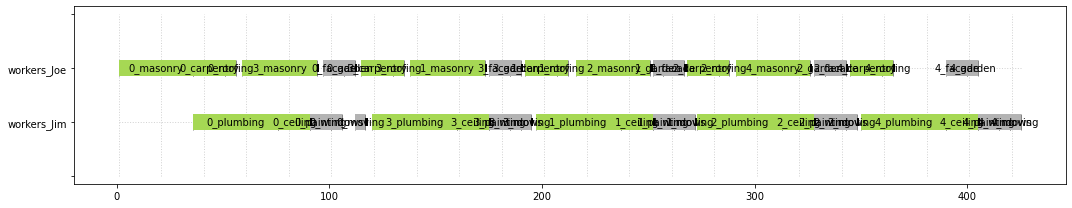

(model: 2896074847, solve: Optimal, search: SearchCompleted, solution: (objs: (13852,), gaps: (7.21917e-05,))) workers_Joe = sequenceVar(["0_masonry", "0_carpentry", "0_roofing", "0_facade", "0_garden", "1_masonry", "1_carpentry", "1_roofing", "1_facade", "1_garden", "2_masonry", "2_carpentry", "2_roofing", "2_facade", "2_garden", "3_masonry", "3_carpentry", "3_roofing", "3_facade", "3_garden", "4_masonry", "4_carpentry", "4_roofing", "4_facade", "4_garden"], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4]) transitionMatrix(0, 1, 2, 3, 4, 1, 0, 1, 2, 3, 2, 1, 0, 1, 2, 3, 2, 1, 0, 1, 4, 3, 2, 1, 0) [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4]
(model: 2896074847, solve: Optimal, search: SearchCompleted, solution: (objs: (13852,), gaps: (7.21917e-05,))) workers_Jim = sequenceVar(["0_plumbing", "0_ceiling", "0_painting", "0_windows", "0_moving", "1_plumbing", "1_ceiling", "1_painting", "1_windows", "1_moving", "2_plumbing", "2_ceil

             360    15000        103    3   F         !presenceOf(_ITV_117)
             360    12000         49    4   F          presenceOf(_ITV_61)
             360    13000         47    4              presenceOf(_ITV_90)
 ! Time = 0.57s, Average fail depth = 21, Memory usage = 9.0 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360    11000         49    5   F         !presenceOf(_ITV_136)
             360    12000         49    5       205  = startOf(_ITV_96)
             360    11000         49    6   F         !presenceOf(_ITV_121)
             360    12000         59    6       215  = startOf(_ITV_76)
             360    13000          2    1   F   315  = startOf(_ITV_150)
 ! Using failure-directed search.
             360    14000          2    1   F   315  = startOf(_ITV_150)
             360    13000         45    2       210  = startOf(_ITV_96)
             360    16000          2    3   F   315  = star

             360    28000          2    5       305  = startOf(_ITV_65)
 ! Time = 1.20s, Average fail depth = 19, Memory usage = 8.7 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360    29000          2    5   F   315  = startOf(_ITV_70)
             360    30000          2    5   F   315  = startOf(_ITV_70)
             360    31000          2    5       300  = startOf(_ITV_150)
             360    27000          2    6       220 != startOf(_ITV_118)
             360    28000          2    6   F          presenceOf(_ITV_127)
             360    29000          2    6       250  = startOf(_ITV_64)
             360    20000          2    1   F         !presenceOf(_ITV_73)
             360    30000          2    2       155 != startOf(_ITV_133)
             360    31000          2    2   F   315  = startOf(_ITV_90)
             360    32000          2    2   F          presenceOf(_ITV_142)
             360    37000  

 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360    47000          2    5   F   315  = startOf(_ITV_90)
             360    48000          2    5       255  = startOf(_ITV_121)
             360    49000          2    5       310  = startOf(_ITV_110)
             360    45000          2    6   F   315  = startOf(_ITV_110)
             360    46000          2    6   F   315  = startOf(_ITV_150)
             360    47000          2    6   F   315  = startOf(_ITV_90)
             360    28000          2    1   F   198 <= startOf(_ITV_53)
             360    48000          2    2       155  = startOf(_ITV_133)
             360    49000          2    2       115 != startOf(_ITV_76)
             360    50000          2    2       185  = startOf(_ITV_133)
             360    55000          2    3   F   315  = startOf(_ITV_70)
             360    56000          2    3   F   315  = startOf(_ITV_150)
             360    57000 

             360    67000          2    5         0  = startOf(_ITV_52)
             360    61000          2    6       285  = startOf(_ITV_108)
             360    62000          2    6        70  = startOf(_ITV_71)
             360    63000          2    6   F   315  = startOf(_ITV_70)
             360    64000          2    6       155  = startOf(_ITV_113)
             360     309k          2    7 
             360     307k          2    8 
             360    36000          2    1        97 >= startOf(_ITV_148)
             360    65000          2    2       290  = startOf(_ITV_88)
             360    66000          2    2   F   315  = startOf(_ITV_110)
             360    67000          2    2             !presenceOf(_ITV_123)
             360    74000          2    3       295  = startOf(_ITV_90)
             360    75000          2    3   F   315  = startOf(_ITV_150)
             360    76000          2    3   F   315  = startOf(_ITV_150)
             360    77000          2    

             360    88000          2    4       180  = startOf(_ITV_84)
             360    85000          2    5   F   315  = startOf(_ITV_90)
             360    86000          2    5   F   315  = startOf(_ITV_110)
             360    87000          2    5   F   315  = startOf(_ITV_90)
             360    80000          2    6       305  = startOf(_ITV_122)
             360    81000          2    6       135 != startOf(_ITV_76)
             360    82000          2    6       250  = startOf(_ITV_75)
             360     399k          2    8 
             360    44000         60    1   F   165 >= startOf(_ITV_65)
             360    45000         71    1       296 >= startOf(_ITV_29)
             360    83000          2    2        50  = startOf(_ITV_121)
             360    84000          2    2       300  = startOf(_ITV_82)
             360    85000          2    2         0  = startOf(_ITV_72)
             360    93000          2    3       265 != startOf(_ITV_84)
             360  

             360     107k          2    4   F          presenceOf(_ITV_81)
             360     102k          2    5       205 != startOf(_ITV_73)
             360     103k          2    5   F   245  = startOf(_ITV_55)
             360     104k          2    5       170  = startOf(_ITV_76)
             360    99000          2    6       275  = startOf(_ITV_88)
             360     100k          2    6             !presenceOf(_ITV_81)
             360     101k          2    6       295 != startOf(_ITV_145)
             360    52000          2    1       220 <= startOf(_ITV_65)
             360     101k          2    2             !presenceOf(_ITV_57)
             360     102k          2    2   F          presenceOf(_ITV_81)
             360     103k          2    2       295  = startOf(_ITV_78)
             360     104k          2    2   F          presenceOf(_ITV_57)
             360     112k          2    3   F          presenceOf(_ITV_136)
 ! Time = 6.00s, Average fail depth = 19, Me

             360     121k          2    5   F   315  = startOf(_ITV_110)
             360     122k          2    5   F   315  = startOf(_ITV_150)
             360     123k          2    5       195  = startOf(_ITV_75)
             360     117k          2    6       290  = startOf(_ITV_142)
             360     118k          2    6   F         !presenceOf(_ITV_62)
             360     119k          2    6       250  = startOf(_ITV_124)
             360    60000          2    1        87 <= startOf(_ITV_17)
             360    61000         89    1   F         !presenceOf(_ITV_76)
             360     119k          2    2   F   315  = startOf(_ITV_70)
             360     120k          2    2       200  = startOf(_ITV_136)
             360     121k          2    2       300  = startOf(_ITV_62)
 ! Time = 6.60s, Average fail depth = 19, Memory usage = 8.7 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     130k     

             360     147k          2    3   F   315  = startOf(_ITV_150)
             360     148k          2    3       120  = startOf(_ITV_108)
             360     143k          2    4       250  = startOf(_ITV_124)
             360     144k          2    4   F   315  = startOf(_ITV_110)
             360     145k          2    4       170  = startOf(_ITV_139)
             360     140k          2    5   F   315  = startOf(_ITV_130)
             360     141k          2    5        35  = startOf(_ITV_91)
             360     142k          2    5   F         !presenceOf(_ITV_150)
             360     136k          2    6         0  = startOf(_ITV_71)
 ! Time = 7.20s, Average fail depth = 19, Memory usage = 8.7 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     137k          2    6   F          presenceOf(_ITV_97)
             360     138k          2    6   F   315  = startOf(_ITV_130)
             360    69000  

             360     160k          2    4   F          presenceOf(_ITV_136)
             360     161k          2    4   F          presenceOf(_ITV_61)
             360     162k          2    4       295  = startOf(_ITV_80)
             360     163k          2    4   F   315  = startOf(_ITV_130)
             360     158k          2    5       245  = startOf(_ITV_101)
             360     159k          2    5       270  = startOf(_ITV_82)
             360     160k          2    5   F   315  = startOf(_ITV_130)
 ! Time = 7.95s, Average fail depth = 19, Memory usage = 8.8 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     156k          2    6        70  = startOf(_ITV_91)
             360     157k          2    6   F          presenceOf(_ITV_101)
             360     158k          2    6   F         !presenceOf(_ITV_104)
             360     159k          2    6        50  = startOf(_ITV_138)
             360    77

             360     173k          2    2       275  = startOf(_ITV_116)
             360     183k          2    3   F          presenceOf(_ITV_81)
             360     184k          2    3   F   315  = startOf(_ITV_70)
             360     185k          2    3        70  = startOf(_ITV_71)
             360     186k          2    3   F   315  = startOf(_ITV_110)
 ! Time = 8.70s, Average fail depth = 20, Memory usage = 8.7 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     179k          2    4   F   315  = startOf(_ITV_70)
             360     180k          2    4       255  = startOf(_ITV_68)
             360     181k          2    4   F   315  = startOf(_ITV_130)
             360     182k          2    4   F          presenceOf(_ITV_136)
             360     177k          2    5   F   315  = startOf(_ITV_90)
             360     178k          2    5   F   315  = startOf(_ITV_90)
             360     179k      

             360     193k          2    6       185  = startOf(_ITV_93)
             360    94000          2    1   F   315  = startOf(_ITV_90)
             360    95000         51    1   F         !presenceOf(_ITV_60)
 ! Time = 9.28s, Average fail depth = 20, Memory usage = 8.7 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     190k          2    2   F   315  = startOf(_ITV_110)
             360     191k          2    2       185  = startOf(_ITV_113)
             360     192k          2    2   F   315  = startOf(_ITV_90)
             360     202k          2    3       240  = startOf(_ITV_115)
             360     203k          2    3   F   315  = startOf(_ITV_150)
             360     204k          2    3       295  = startOf(_ITV_118)
             360     199k          2    4   F   315  = startOf(_ITV_90)
             360     200k          2    4   F   295  = startOf(_ITV_104)
             360     195k       

             360     210k          2    6       265  = startOf(_ITV_57)
 ! Time = 9.92s, Average fail depth = 20, Memory usage = 8.8 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     211k          2    6        35  = startOf(_ITV_73)
             360     212k          2    6       280  = startOf(_ITV_144)
             360     213k          2    6   F   315  = startOf(_ITV_90)
             360     104k          2    1       282 <= startOf(_ITV_77)
             360     105k         74    1   F   184 >= startOf(_ITV_44)
             360     209k          2    2   F   315  = startOf(_ITV_150)
             360     210k          2    2       170  = startOf(_ITV_56)
             360     211k          2    2       235  = startOf(_ITV_78)
             360     221k          2    3       305  = startOf(_ITV_100)
             360     222k          2    3       265 != startOf(_ITV_62)
             360     223k          2  

 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     227k          2    5       285  = startOf(_ITV_108)
             360     228k          2    5   F         !presenceOf(_ITV_137)
             360     229k          2    5       295  = startOf(_ITV_82)
             360     230k          2    6       275  = startOf(_ITV_144)
             360     231k          2    6   F   315  = startOf(_ITV_90)
             360     114k          2    1   F          presenceOf(_ITV_56)
             360     115k          2    1   F   262 <= startOf(_ITV_4)
             360     226k          2    2   F         !presenceOf(_ITV_96)
             360     227k          2    2       190  = startOf(_ITV_138)
             360     228k          2    2   F          presenceOf(_ITV_76)
             360     229k          2    2       235  = startOf(_ITV_56)
             360     240k          2    3       195  = startOf(_ITV_55)
             360  

             360     244k          2    2       245  = startOf(_ITV_78)
             360     255k          2    3   F   315  = startOf(_ITV_70)
             360     256k          2    3   F   315  = startOf(_ITV_70)
             360     257k          2    3       275  = startOf(_ITV_108)
             360     252k          2    4        75  = startOf(_ITV_95)
             360     253k          2    4       270  = startOf(_ITV_80)
             360     254k          2    4       280  = startOf(_ITV_128)
             360     246k          2    5       170  = startOf(_ITV_55)
             360     247k          2    5   F          presenceOf(_ITV_81)
             360     248k          2    5       150  = startOf(_ITV_70)
             360     250k          2    6   F   315  = startOf(_ITV_150)
             360     251k          2    6   F   150  = startOf(_ITV_116)
             360     252k          2    6   F   315  = startOf(_ITV_150)
             360     123k          2    1   F   315  = s

             360     263k          2    2       115  = startOf(_ITV_115)
             360     264k          2    2       255  = startOf(_ITV_55)
             360     265k          2    2   F   315  = startOf(_ITV_70)
             360     274k          2    3       280  = startOf(_ITV_122)
             360     275k          2    3       245  = startOf(_ITV_80)
             360     270k          2    4   F   315  = startOf(_ITV_150)
             360     271k          2    4       205  = startOf(_ITV_83)
             360     272k          2    4         0  = startOf(_ITV_52)
             360     263k          2    5   F   315  = startOf(_ITV_130)
             360     264k          2    5        65  = startOf(_ITV_81)
             360     265k          2    5   F   315  = startOf(_ITV_130)
             360     268k          2    6   F   315  = startOf(_ITV_70)
             360     269k          2    6   F   315  = startOf(_ITV_150)
             360     270k          2    6       225  = sta

             360     282k          2    2   F          presenceOf(_ITV_76)
             360     292k          2    3   F   315  = startOf(_ITV_150)
             360     293k          2    3       125  = startOf(_ITV_56)
             360     294k          2    3   F   315  = startOf(_ITV_150)
             360     288k          2    4   F   315  = startOf(_ITV_130)
             360     289k          2    4   F   315  = startOf(_ITV_90)
             360     290k          2    4   F   315  = startOf(_ITV_130)
             360     280k          2    5   F          presenceOf(_ITV_56)
             360     281k          2    5       300  = startOf(_ITV_90)
             360     282k          2    5       305  = startOf(_ITV_142)
             360     287k          2    6   F   315  = startOf(_ITV_90)
             360     288k          2    6       305  = startOf(_ITV_84)
             360     289k          2    6   F   315  = startOf(_ITV_90)
             360     290k          2    6       195  

             360     300k          2    2       285  = startOf(_ITV_145)
             360     301k          2    2       230  = startOf(_ITV_96)
             360     309k          2    3   F   315  = startOf(_ITV_110)
             360     310k          2    3   F   315  = startOf(_ITV_110)
             360     311k          2    3   F         !presenceOf(_ITV_56)
             360     306k          2    4        50  = startOf(_ITV_81)
             360     307k          2    4       160  = startOf(_ITV_135)
             360     308k          2    4       115  = startOf(_ITV_95)
             360     299k          2    5   F         !presenceOf(_ITV_139)
             360     300k          2    5   F   315  = startOf(_ITV_150)
             360     306k          2    6   F   315  = startOf(_ITV_150)
             360     307k          2    6       295  = startOf(_ITV_122)
             360    1572k          2    7 
             360    1570k          2    8 
 ! Time = 13.96s, Average fail depth

             360     317k          2    2       210 != startOf(_ITV_58)
             360     318k          2    2   F   295  = startOf(_ITV_145)
             360     319k          2    2       270  = startOf(_ITV_104)
             360     330k          2    3       115  = startOf(_ITV_104)
             360     331k          2    3       170  = startOf(_ITV_133)
             360     332k          2    3   F   315  = startOf(_ITV_130)
             360     325k          2    4       285 != startOf(_ITV_142)
             360     326k          2    4   F   315  = startOf(_ITV_90)
             360     327k          2    4       195 != startOf(_ITV_95)
             360     317k          2    5       170  = startOf(_ITV_93)
             360     318k          2    5   F   315  = startOf(_ITV_150)
 ! Time = 15.64s, Average fail depth = 20, Memory usage = 8.8 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     319k        

             360    1755k          2    7 
             360    1750k          2    8 
             360     166k         75    1   F   282 >= startOf(_ITV_100)
             360     167k          2    1             !presenceOf(_ITV_56)
             360     335k          2    2       115  = startOf(_ITV_150)
             360     336k          2    2        35  = startOf(_ITV_117)
             360     337k          2    2       170  = startOf(_ITV_58)
             360     348k          2    3   F          presenceOf(_ITV_56)
             360     349k          2    3             !presenceOf(_ITV_103)
 ! Time = 16.20s, Average fail depth = 20, Memory usage = 8.8 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     350k          2    3   F   315  = startOf(_ITV_130)
             360     351k          2    3   F   315  = startOf(_ITV_130)
             360     344k          2    4       140  = startOf(_ITV_56)
           

             360     355k          2    5       170  = startOf(_ITV_93)
             360     355k          2    6       275  = startOf(_ITV_64)
             360     356k          2    6       300 != startOf(_ITV_102)
             360     357k          2    6       200  = startOf(_ITV_82)
             360     358k          2    6       290  = startOf(_ITV_70)
             360    1844k          2    7 
 ! Time = 16.70s, Average fail depth = 20, Memory usage = 8.8 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     176k         56    1   F   248 >= startOf(_ITV_41)
             360     177k         29    1              presenceOf(_ITV_120)
             360     355k          2    2       195  = startOf(_ITV_55)
             360     356k          2    2       295  = startOf(_ITV_125)
             360     357k          2    2        70  = startOf(_ITV_71)
             360     367k          2    3       270  = startOf(

             360     373k          2    5       300  = startOf(_ITV_142)
             360     374k          2    6       155 != startOf(_ITV_113)
             360     375k          2    6       260  = startOf(_ITV_148)
 ! Time = 17.36s, Average fail depth = 20, Memory usage = 8.8 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     376k          2    6   F   315  = startOf(_ITV_110)
             360     185k         81    1        54 <= startOf(_ITV_5)
             360     186k         53    1   F   295 <= startOf(_ITV_9)
             360     373k          2    2   F   315  = startOf(_ITV_70)
             360     374k          2    2       270  = startOf(_ITV_148)
             360     375k          2    2       205 != startOf(_ITV_128)
             360     386k          2    3        90  = startOf(_ITV_115)
             360     387k          2    3       310  = startOf(_ITV_110)
             360     380k         

             360     390k          2    5       200  = startOf(_ITV_138)
 ! Time = 17.99s, Average fail depth = 20, Memory usage = 8.8 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     391k          2    5       260  = startOf(_ITV_64)
             360     392k          2    5       210  = startOf(_ITV_97)
             360     393k          2    5   F   295  = startOf(_ITV_85)
             360     392k          2    6        95  = startOf(_ITV_75)
             360     393k          2    6       225  = startOf(_ITV_75)
             360     394k          2    6        65  = startOf(_ITV_76)
             360     195k         79    1   F   113 <= startOf(_ITV_24)
             360     391k          2    2       290  = startOf(_ITV_68)
             360     392k          2    2       305  = startOf(_ITV_100)
             360     393k          2    2   F   135  = startOf(_ITV_60)
             360     394k          2  

 !          Best Branches  Non-fixed    W       Branch decision
             360     422k          2    3   F   240  = startOf(_ITV_137)
             360     414k          2    4       280  = startOf(_ITV_64)
             360     415k          2    4       240  = startOf(_ITV_108)
             360     416k          2    4       310  = startOf(_ITV_70)
             360     417k          2    4       295  = startOf(_ITV_125)
             360     409k          2    5        70  = startOf(_ITV_131)
             360     410k          2    5       245  = startOf(_ITV_138)
             360     411k          2    5   F   315  = startOf(_ITV_110)
             360     412k          2    5   F   315  = startOf(_ITV_110)
             360     411k          2    6   F   315  = startOf(_ITV_90)
             360     412k          2    6       230  = startOf(_ITV_57)
             360     413k          2    6   F   315  = startOf(_ITV_130)
             360     204k         76    1   F   285 >= startOf(_

             360     427k          2    2       205  = startOf(_ITV_73)
             360     428k          2    2       305  = startOf(_ITV_124)
             360     439k          2    3       200  = startOf(_ITV_78)
             360     440k          2    3       220  = startOf(_ITV_116)
             360     433k          2    4       215 != startOf(_ITV_73)
             360     434k          2    4   F   315  = startOf(_ITV_130)
             360     429k          2    5   F         !presenceOf(_ITV_77)
             360     430k          2    5        35  = startOf(_ITV_95)
             360     431k          2    5   F   315  = startOf(_ITV_90)
             360     430k          2    6   F   315  = startOf(_ITV_130)
             360     431k          2    6       185  = startOf(_ITV_93)
             360     432k          2    6       170  = startOf(_ITV_55)
             360     433k          2    6   F   315  = startOf(_ITV_130)
             360     212k         99    1   F   119 <= s

             360     446k          2    2        70  = startOf(_ITV_51)
             360     447k          2    2       265  = startOf(_ITV_141)
             360     448k          2    2       140  = startOf(_ITV_73)
             360     456k          2    3       190  = startOf(_ITV_130)
             360     457k          2    3   F   315  = startOf(_ITV_130)
             360     451k          2    4   F   315  = startOf(_ITV_130)
             360     452k          2    4   F   315  = startOf(_ITV_90)
             360     453k          2    4        35  = startOf(_ITV_77)
             360     447k          2    5   F   270  = startOf(_ITV_130)
             360     448k          2    5       225 != startOf(_ITV_55)
             360     449k          2    5       250  = startOf(_ITV_61)
             360     448k          2    6   F   315  = startOf(_ITV_130)
             360     449k          2    6   F   315  = startOf(_ITV_110)
             360     450k          2    6       300  = st

             360     464k          2    2       165 != startOf(_ITV_95)
             360     465k          2    2       255  = startOf(_ITV_124)
             360     466k          2    2   F   315  = startOf(_ITV_90)
             360     472k          2    3       240 != startOf(_ITV_142)
             360     473k          2    3   F   315  = startOf(_ITV_110)
             360     474k          2    3   F   315  = startOf(_ITV_110)
             360     469k          2    4   F          presenceOf(_ITV_97)
             360     470k          2    4       305  = startOf(_ITV_85)
             360     471k          2    4       235 != startOf(_ITV_73)
             360     466k          2    5       135  = startOf(_ITV_73)
             360     467k          2    5   F   315  = startOf(_ITV_130)
             360     468k          2    5   F         !presenceOf(_ITV_76)
             360     468k          2    6   F   315  = startOf(_ITV_150)
             360     469k          2    6   F   315 

             360     239k         53    1              presenceOf(_ITV_120)
             360     240k         91    1       179 >= startOf(_ITV_56)
             360     482k          2    2        35  = startOf(_ITV_73)
             360     483k          2    2   F   315  = startOf(_ITV_70)
             360     484k          2    2       275 != startOf(_ITV_59)
             360     485k         43    2   F          presenceOf(_ITV_57)
             360     490k          2    3       265  = startOf(_ITV_64)
             360     491k          2    3       185  = startOf(_ITV_121)
             360     492k          2    3   F   315  = startOf(_ITV_150)
             360     493k          2    3       215  = startOf(_ITV_136)
             360     486k          2    4   F          presenceOf(_ITV_83)
             360     487k          2    4       245  = startOf(_ITV_88)
 ! Time = 21.05s, Average fail depth = 20, Memory usage = 8.8 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Br

             360     247k         71    1   F   169 <= startOf(_ITV_99)
             360     501k          2    2       180 != startOf(_ITV_135)
             360     502k          2    2   F          presenceOf(_ITV_117)
             360     503k          2    2       185  = startOf(_ITV_75)
             360     509k          2    3       165  = startOf(_ITV_96)
             360     510k          2    3       280 != startOf(_ITV_102)
             360     511k          2    3       310  = startOf(_ITV_110)
             360     512k          2    3         0  = startOf(_ITV_72)
             360     505k          2    4   F   315  = startOf(_ITV_90)
             360     506k          2    4   F         !presenceOf(_ITV_136)
 ! Time = 21.67s, Average fail depth = 20, Memory usage = 8.8 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     504k          2    5   F   315  = startOf(_ITV_130)
             360     505k   

             360     520k          2    6       230  = startOf(_ITV_68)
             360     521k          2    6        75 != startOf(_ITV_62)
             360     522k          2    6   F         !presenceOf(_ITV_103)
             360     258k         81    1   F   205 >= startOf(_ITV_64)
             360     518k          2    2   F   315  = startOf(_ITV_90)
             360     519k          2    2       295  = startOf(_ITV_82)
             360     520k          2    2       210  = startOf(_ITV_59)
             360     528k          2    3       195 != startOf(_ITV_118)
 ! Time = 22.48s, Average fail depth = 20, Memory usage = 8.8 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     529k          2    3   F   315  = startOf(_ITV_90)
             360     530k          2    3   F          presenceOf(_ITV_120)
             360     523k          2    4       280 != startOf(_ITV_84)
             360     524k      

             360     539k          2    5       300  = startOf(_ITV_82)
             360     540k          2    5       280  = startOf(_ITV_58)
             360     541k          2    5       295  = startOf(_ITV_144)
             360     542k          2    5       190  = startOf(_ITV_133)
             360     540k          2    6       305  = startOf(_ITV_130)
             360     541k          2    6   F         !presenceOf(_ITV_148)
 ! Time = 23.14s, Average fail depth = 20, Memory usage = 8.8 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     268k          2    1   F   315  = startOf(_ITV_90)
             360     269k          2    1   F         !presenceOf(_ITV_120)
             360     536k          2    2       305  = startOf(_ITV_90)
             360     537k          2    2   F   315  = startOf(_ITV_70)
             360     538k          2    2   F   315  = startOf(_ITV_90)
             360     546k    

             360     564k          2    3   F   315  = startOf(_ITV_110)
             360     565k          2    3       165  = startOf(_ITV_133)
             360     557k          2    4   F         !presenceOf(_ITV_137)
             360     558k          2    4   F   315  = startOf(_ITV_110)
 ! Time = 24.00s, Average fail depth = 20, Memory usage = 8.8 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     559k          2    4       305  = startOf(_ITV_80)
             360     560k          2    4       250 != startOf(_ITV_116)
             360     559k          2    5   F         !presenceOf(_ITV_76)
             360     560k          2    5       160  = startOf(_ITV_120)
             360     561k          2    5       305  = startOf(_ITV_142)
             360     562k          2    5       115  = startOf(_ITV_95)
             360     557k          2    6       200  = startOf(_ITV_56)
             360     558k  

             360     284k         74    1       299 <= startOf(_ITV_20)
             360     573k          2    2   F         !presenceOf(_ITV_61)
 ! Time = 24.86s, Average fail depth = 20, Memory usage = 8.8 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     574k          2    2        55  = startOf(_ITV_57)
             360     575k          2    2   F          presenceOf(_ITV_76)
             360     581k          2    3   F   315  = startOf(_ITV_110)
             360     582k          2    3       290  = startOf(_ITV_144)
             360     583k          2    3   F   315  = startOf(_ITV_150)
             360     577k          2    4   F   315  = startOf(_ITV_150)
             360     578k          2    4       190  = startOf(_ITV_104)
             360     579k          2    4   F          presenceOf(_ITV_117)
             360     578k          2    5        70  = startOf(_ITV_91)
             360     579k

 ! Time = 25.55s, Average fail depth = 20, Memory usage = 8.8 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     593k          2    6       105  = startOf(_ITV_131)
             360     594k          2    6       285  = startOf(_ITV_142)
             360    3108k          2    7 
             360    3107k          2    8 
             360     292k         87    1       194 >= startOf(_ITV_56)
             360     293k          2    1       285  = startOf(_ITV_88)
             360     294k          2    1             !presenceOf(_ITV_80)
             360     592k          2    2   F   313  = startOf(_ITV_90)
             360     593k          2    2        75  = startOf(_ITV_95)
             360     594k          2    2       235  = startOf(_ITV_82)
             360     600k          2    3       185  = startOf(_ITV_61)
             360     601k          2    3   F   315  = startOf(_ITV_150)
             360    

             360     619k          2    3   F   315  = startOf(_ITV_70)
             360     611k          2    4   F          presenceOf(_ITV_136)
             360     612k          2    4        70  = startOf(_ITV_51)
             360     613k          2    4   F   270  = startOf(_ITV_150)
             360     614k          2    4   F   315  = startOf(_ITV_150)
             360     614k          2    5   F         !presenceOf(_ITV_77)
             360     615k          2    5       285  = startOf(_ITV_88)
             360     612k          2    6   F         !presenceOf(_ITV_101)
             360     613k          2    6   F   315  = startOf(_ITV_70)
             360     614k          2    6       185  = startOf(_ITV_118)
             360    3199k          4    7 
             360    3198k          2    8 
             360     302k         78    1   F   168 <= startOf(_ITV_41)
             360     303k         71    1       198 <= startOf(_ITV_53)
             360     610k          2

             360    3288k          2    7 
             360    3290k          2    8 
             360     310k         91    1       216 >= startOf(_ITV_43)
             360     311k         76    1   F         !presenceOf(_ITV_116)
             360     627k          2    2       215  = startOf(_ITV_111)
             360     628k          2    2       195  = startOf(_ITV_82)
             360     629k          2    2       245  = startOf(_ITV_56)
             360     636k          2    3   F   315  = startOf(_ITV_130)
             360     637k          2    3       310  = startOf(_ITV_122)
             360     638k          2    3       250  = startOf(_ITV_62)
             360     639k          2    3   F   315  = startOf(_ITV_90)
             360     631k          2    4             !presenceOf(_ITV_76)
             360     632k          2    4       170  = startOf(_ITV_97)
             360     633k          2    4   F         !presenceOf(_ITV_101)
             360     633k          2

             360     647k          2    6   F   315  = startOf(_ITV_90)
             360     648k          2    6   F   315  = startOf(_ITV_90)
             360     649k          2    6       220  = startOf(_ITV_96)
             360    3379k          2    7 
             360    3379k          2    8 
             360     318k          2    1   F         !presenceOf(_ITV_137)
             360     319k         26    1       219 >= startOf(_ITV_137)
             360     646k          2    2       105  = startOf(_ITV_133)
             360     647k          2    2   F   315  = startOf(_ITV_70)
             360     648k          2    2   F   315  = startOf(_ITV_70)
             360     656k          2    3       175 != startOf(_ITV_56)
             360     657k          2    3       305  = startOf(_ITV_60)
             360     649k          2    4   F         !presenceOf(_ITV_141)
             360     650k          2    4       250  = startOf(_ITV_68)
             360     651k          2    

             360     664k          2    6       200  = startOf(_ITV_135)
             360     665k          2    6   F         !presenceOf(_ITV_136)
             360     666k          2    6       135  = startOf(_ITV_95)
             360     327k         51    1   F         !presenceOf(_ITV_120)
             360     665k          2    2   F   315  = startOf(_ITV_130)
             360     666k          2    2   F   315  = startOf(_ITV_130)
             360     667k          2    2       120  = startOf(_ITV_101)
             360     673k          2    3             !presenceOf(_ITV_143)
             360     674k          2    3   F   165  = startOf(_ITV_95)
             360     668k          2    4       230  = startOf(_ITV_121)
             360     669k          2    4       190  = startOf(_ITV_53)
             360     670k          2    4   F          presenceOf(_ITV_140)
             360     670k          2    5       250  = startOf(_ITV_98)
 ! Time = 28.42s, Average fail depth = 20, 

             360     681k          2    6       155  = startOf(_ITV_133)
             360     682k          2    6       125  = startOf(_ITV_70)
             360     683k          2    6   F   315  = startOf(_ITV_110)
             360     684k          2    6   F   315  = startOf(_ITV_150)
             360     337k         69    1   F   229 >= startOf(_ITV_57)
             360     683k          2    2       300  = startOf(_ITV_108)
             360     684k          2    2       210  = startOf(_ITV_118)
             360     691k          2    3       100  = startOf(_ITV_111)
             360     692k          2    3             !presenceOf(_ITV_63)
             360     693k          2    3       310  = startOf(_ITV_150)
             360     694k          2    3   F         !presenceOf(_ITV_101)
 ! Time = 29.19s, Average fail depth = 20, Memory usage = 8.8 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     686k 

             360     703k          2    5       295  = startOf(_ITV_100)
             360     704k          2    5   F   315  = startOf(_ITV_130)
             360     705k          2    5       170  = startOf(_ITV_116)
             360     700k          2    6       270  = startOf(_ITV_58)
             360     701k          2    6   F   315  = startOf(_ITV_130)
             360     702k          2    6       130  = startOf(_ITV_68)
             360     346k         46    1   F   245 >= startOf(_ITV_138)
             360     347k         65    1   F   134 >= startOf(_ITV_57)
             360     702k          2    2   F         !presenceOf(_ITV_56)
 ! Time = 29.82s, Average fail depth = 20, Memory usage = 8.9 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     703k          2    2       220  = startOf(_ITV_81)
             360     704k          2    2       290  = startOf(_ITV_102)
             360     710k      

             360     723k          2    4   F         !presenceOf(_ITV_150)
             360     724k          2    4         0  = startOf(_ITV_112)
             360     722k          2    5       305  = startOf(_ITV_64)
             360     723k          2    5       105  = startOf(_ITV_71)
             360     724k          2    5   F   315  = startOf(_ITV_110)
             360     719k          2    6   F   315  = startOf(_ITV_110)
             360     720k          2    6       280  = startOf(_ITV_142)
 ! Time = 30.32s, Average fail depth = 20, Memory usage = 8.9 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     721k          2    6        75  = startOf(_ITV_119)
             360     355k         46    1   F   272 >= startOf(_ITV_26)
             360     356k         39    1   F   134 >= startOf(_ITV_116)
             360     719k          2    2       295  = startOf(_ITV_142)
             360     720k    

             360     741k          2    4        60  = startOf(_ITV_82)
             360     742k          2    4       135 != startOf(_ITV_91)
             360     743k          2    4       160  = startOf(_ITV_95)
             360     740k          2    5   F   315  = startOf(_ITV_130)
             360     741k          2    5   F   315  = startOf(_ITV_110)
 ! Time = 31.11s, Average fail depth = 20, Memory usage = 8.9 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     742k          2    5       235  = startOf(_ITV_78)
             360     736k          2    6       260  = startOf(_ITV_108)
             360     737k          2    6       310  = startOf(_ITV_70)
             360     738k          2    6       120  = startOf(_ITV_128)
             360     364k         34    1   F   224 >= startOf(_ITV_41)
             360     365k         26    1   F         !presenceOf(_ITV_60)
             360     738k        

             360     765k          2    3       155  = startOf(_ITV_121)
             360     759k          2    4       245 != startOf(_ITV_118)
             360     760k          2    4        85  = startOf(_ITV_113)
 ! Time = 31.82s, Average fail depth = 20, Memory usage = 8.9 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     761k          2    4       265 != startOf(_ITV_64)
             360     762k          2    4       280  = startOf(_ITV_139)
             360     758k          2    5        35  = startOf(_ITV_114)
             360     759k          2    5   F   315  = startOf(_ITV_150)
             360     760k          2    5   F   225  = startOf(_ITV_77)
             360     761k          2    5        50  = startOf(_ITV_101)
             360     755k          2    6       240  = startOf(_ITV_108)
             360     756k          2    6   F          presenceOf(_ITV_96)
             360     373k    

             360     784k          2    3       270  = startOf(_ITV_104)
 ! Time = 32.53s, Average fail depth = 20, Memory usage = 8.9 MB
 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     778k          2    4       305  = startOf(_ITV_70)
             360     779k          2    4   F   315  = startOf(_ITV_130)
             360     777k          2    5        35  = startOf(_ITV_114)
             360     778k          2    5   F         !presenceOf(_ITV_76)
             360     779k          2    5       255 != startOf(_ITV_97)
             360     773k          2    6       230  = startOf(_ITV_58)
             360     774k          2    6       125  = startOf(_ITV_100)
             360     775k          2    6   F   315  = startOf(_ITV_110)
             360     380k         67    1   F         !presenceOf(_ITV_76)
             360     775k          2    2       145  = startOf(_ITV_60)
             360     776k    

 ! Current bound is 369 (gap is 2.50%)
 !          Best Branches  Non-fixed    W       Branch decision
             360     799k          2    3       310  = startOf(_ITV_90)
             360     800k          2    3   F          presenceOf(_ITV_141)
             360     801k          2    3             !presenceOf(_ITV_96)
             360     796k          2    4       250  = startOf(_ITV_84)
             360     797k          2    4   F   315  = startOf(_ITV_70)
             360     798k          2    4   F   315  = startOf(_ITV_90)
             360     797k          2    5       265  = startOf(_ITV_124)
             360     798k          2    5   F          presenceOf(_ITV_77)
             360     799k          2    5       260  = startOf(_ITV_122)
             360     790k          2    6       125  = startOf(_ITV_123)
             360     791k          2    6   F   315  = startOf(_ITV_130)
             360     389k          2    1              presenceOf(_ITV_60)
             360

 + New bound is 366 (gap is 1.67%)
             360     395k         77    1   F         !presenceOf(_ITV_120)
 + New bound is 360 (gap is 0.00%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 6 solutions found.
 ! Best objective         : 360 (optimal - effective tol. is 0)
 ! Best bound             : 360
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 12989544
 ! Number of fails        : 2015410
 ! Total memory usage     : 9.3 MB (9.2 MB CP Optimizer + 0.1 MB Concert)
 ! Time spent in solve    : 33.84s (33.83s engine + 0.01s extraction)
 ! Search speed (br. / s) : 384044.7
 ! ----------------------------------------------------------------------------
done
Cost will be 360


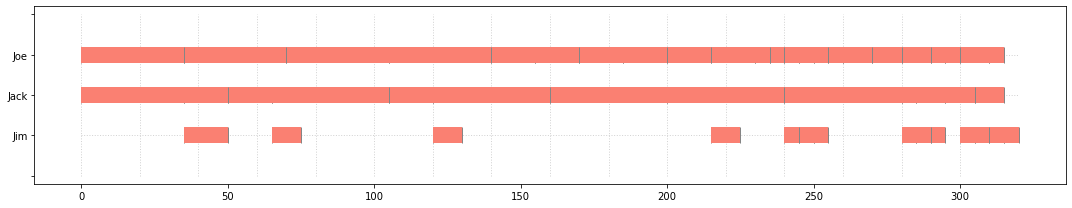

In [4]:
!pip install docplex
!pip install cplex
import numpy as np
import pandas as pd
import random
import copy
import math
from itertools import permutations
from docplex.mp.model import Model

cost = np.random.randint(1, 10, (3,3))
print(cost)
model = Model(name = 'test')
x = model.binary_var_matrix(cost.shape[0], cost.shape[1], name = 'x')

model.add_constraints((sum(x[i,j] for i in range(cost.shape[0])) <= 1 for j in range(cost.shape[1])), names = 'work_load')

model.add_constraints((sum(x[i,j] for j in range(cost.shape[1])) == 1 for i in range(cost.shape[0])), names = 'task_completion')

obj_fn = sum(cost[i,j]*x[i,j] for i in range(cost.shape[0]) for j in range(cost.shape[1]))
model.set_objective('min', obj_fn)

model.solve()
model.print_solution()

#Randomly searchs for a minimum value

# Using pyomo example

!pip install pyomo
from pyomo.environ import *
from pyomo.opt import SolverFactory

# Define days (1 week)
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Enter shifts of each day
shifts = ['morning', 'evening', 'night']  # 3 shifts of 8 hours
days_shifts = {day: shifts for day in days}  # dict with day as key and list of its shifts as value

# Enter workers ids (name, number, ...)
workers = ['W' + str(i) for i in range(1, 11)]  # 10 workers available, more than needed

# Initialize model
model = ConcreteModel()

# binary variables representing if a worker is scheduled somewhere
model.works = Var(((worker, day, shift) for worker in workers for day in days for shift in days_shifts[day]),
                  within=Binary, initialize=0)

# binary variables representing if a worker is necessary
model.needed = Var(workers, within=Binary, initialize=0)

# binary variables representing if a worker worked on sunday but not on saturday (avoid if possible)
model.no_pref = Var(workers, within=Binary, initialize=0)

# Define an objective function with model as input, to pass later
def obj_rule(m):
    c = len(workers)
    return sum(m.no_pref[worker] for worker in workers) + sum(c * m.needed[worker] for worker in workers)
# we multiply the second term by a constant to make sure that it is the primary objective
# since sum(m.no_prefer) is at most len(workers), len(workers) + 1 is a valid constant.


# add objective function to the model. rule (pass function) or expr (pass expression directly)
model.obj = Objective(rule=obj_rule, sense=minimize)

model.constraints = ConstraintList()  # Create a set of constraints

# Constraint: all shifts are assigned
for day in days:
    for shift in days_shifts[day]:
        if day in days[:-1] and shift in ['morning', 'evening']:
            # weekdays' and Saturdays' day shifts have exactly two workers
            model.constraints.add(  # to add a constraint to model.constraints set
                2 == sum(model.works[worker, day, shift] for worker in workers)
            )
        else:
            # Sundays' and nights' shifts have exactly one worker
            model.constraints.add(
                1 == sum(model.works[worker, day, shift] for worker in workers)
            )

# Constraint: no more than 40 hours worked
for worker in workers:
    model.constraints.add(
        40 >= sum(8 * model.works[worker, day, shift] for day in days for shift in days_shifts[day])
    )

# Constraint: rest between two shifts is of 12 hours (i.e., at least two shifts)
for worker in workers:
    for j in range(len(days)):
        # if working in morning, cannot work again that day
        model.constraints.add(
            1 >= sum(model.works[worker, days[j], shift] for shift in days_shifts[days[j]])
        )
        # if working in evening, until next evening (note that after sunday comes next monday)
        model.constraints.add(
            1 >= sum(model.works[worker, days[j], shift] for shift in ['evening', 'night']) +
            model.works[worker, days[(j + 1) % 7], 'morning']
        )
        # if working in night, until next night
        model.constraints.add(
            1 >= model.works[worker, days[j], 'night'] +
            sum(model.works[worker, days[(j + 1) % 7], shift] for shift in ['morning', 'evening'])
        )

# Constraint (def of model.needed)
for worker in workers:
    model.constraints.add(
        10000 * model.needed[worker] >= sum(model.works[worker, day, shift] for day in days for shift in days_shifts[day])
    )  # if any model.works[worker, ·, ·] non-zero, model.needed[worker] must be one; else is zero to reduce the obj function
    # 10000 is to remark, but 5 was enough since max of 40 hours yields max of 5 shifts, the maximum possible sum

# Constraint (def of model.no_pref)
for worker in workers:
    model.constraints.add(
        model.no_pref[worker] >= sum(model.works[worker, 'Sat', shift] for shift in days_shifts['Sat'])
        - sum(model.works[worker, 'Sun', shift] for shift in days_shifts['Sun'])
    )  # if not working on sunday but working saturday model.needed must be 1; else will be zero to reduce the obj function

# Cplex Housing Problem

#https://ibmdecisionoptimization.github.io/tutorials/html/Scheduling_Tutorial.html

NbHouses = 5

WorkerNames = ["Joe", "Jim"]

TaskNames = ["masonry", "carpentry", "plumbing", 
             "ceiling", "roofing", "painting", 
             "windows", "facade", "garden", "moving"]

Duration =  [35, 15, 40, 15, 5, 10, 5, 10, 5, 5]

Worker = {"masonry"  : "Joe" , 
          "carpentry": "Joe" , 
          "plumbing" : "Jim" , 
          "ceiling"  : "Jim" , 
          "roofing"  : "Joe" , 
          "painting" : "Jim" , 
          "windows"  : "Jim" , 
          "facade"   : "Joe" , 
          "garden"   : "Joe" , 
          "moving"   : "Jim"}

ReleaseDate = [  0,     0,   151,    59,   243]
DueDate     = [120,   212,   304,   181,   425]
Weight      = [100.0, 100.0, 100.0, 200.0, 100.0]

Precedences = [("masonry", "carpentry"),("masonry", "plumbing"),
               ("masonry", "ceiling"), ("carpentry", "roofing"),
               ("ceiling", "painting"), ("roofing", "windows"),  
               ("roofing", "facade"), ("plumbing", "facade"),
               ("roofing", "garden"), ("plumbing", "garden"),
               ("windows", "moving"), ("facade", "moving"),  
               ("garden", "moving"), ("painting", "moving")]

Houses = range(NbHouses)

import sys
from docplex.cp.model import *
url = None
key = None
mdl2 = CpoModel()

houses = [mdl2.interval_var(start=(ReleaseDate[i], INTERVAL_MAX), name="house"+str(i)) for i in Houses]

TaskNames_ids = {}
itvs = {}
for h in Houses:
    for i,t in enumerate(TaskNames):
        _name = str(h)+"_"+str(t)
        itvs[(h,t)] = mdl2.interval_var(size=Duration[i], name=_name)
        TaskNames_ids[_name] = i

TaskNames_ids = {}
itvs = {}
for h in Houses:
    for i,t in enumerate(TaskNames):
        _name = str(h)+"_"+str(t)
        itvs[(h,t)] = mdl2.interval_var(size=Duration[i], name=_name)
        TaskNames_ids[_name] = i

for h in Houses:
    for p in Precedences:
        mdl2.add(mdl2.end_before_start(itvs[(h,p[0])], itvs[(h,p[1])]) )

for h in Houses:
    mdl2.add( mdl2.span(houses[h], [itvs[(h,t)] for t in TaskNames] ) )

transitionTimes = transition_matrix(NbHouses)
for i in Houses:
    for j in Houses:
        transitionTimes.set_value(i, j, int(abs(i - j)))

workers = {w : mdl2.sequence_var([ itvs[(h,t)] for h in Houses for t in TaskNames if Worker[t]==w ], 
                                types=[h for h in Houses for t in TaskNames if Worker[t]==w ], name="workers_"+w)   
           for w in WorkerNames}

for w in WorkerNames:
    mdl2.add( mdl2.no_overlap(workers[w], transitionTimes) )

# create the obj and add it.
mdl2.add( 
    mdl2.minimize( 
        mdl2.sum(Weight[h] * mdl2.max([0, mdl2.end_of(houses[h])-DueDate[h]]) + mdl2.length_of(houses[h]) for h in Houses) 
    ) 
)

print("\nSolving model....")
msol2 = mdl2.solve()
print("done")

#cost


# Viewing the results of sequencing problems in a Gantt chart
# (double click on the gantt to see details)
import docplex.cp.utils_visu as visu
import matplotlib.pyplot as plt
%matplotlib inline
#Change the plot size
from pylab import rcParams
rcParams['figure.figsize'] = 15, 3

def showsequence(msol, s, setup, tp):
    seq = msol.get_var_solution(s)
    visu.sequence(name=s.get_name())
    vs = seq.get_value()
    for v in vs:
        nm = v.get_name()
        visu.interval(v, tp[TaskNames_ids[nm]], nm)
    for i in range(len(vs) - 1):
        end = vs[i].get_end()
        tp1 = tp[TaskNames_ids[vs[i].get_name()]]
        tp2 = tp[TaskNames_ids[vs[i + 1].get_name()]]
        visu.transition(end, end + setup.get_value(tp1, tp2))

visu.timeline("Solution for SchedSetup")
for w in WorkerNames:
    types=[h for h in Houses for t in TaskNames if Worker[t]==w]
    showsequence(msol2, workers[w], transitionTimes, types)
visu.show()

for w in WorkerNames:
    types=[h for h in Houses for t in TaskNames if Worker[t]==w]
    print(msol2, workers[w], transitionTimes, types)







NbHouses = 5
Deadline =  318

Workers = ["Joe", "Jack", "Jim"]

Tasks = ["masonry", "carpentry", "plumbing", "ceiling","roofing", "painting", "windows", "facade","garden", "moving"]

Durations =  [35, 15, 40, 15, 5, 10, 5, 10, 5, 5]

Skills = [("Joe","masonry",9),("Joe","carpentry",7),("Joe","ceiling",5),("Joe","roofing",6), 
          ("Joe","windows",8),("Joe","facade",5),("Joe","garden",5),("Joe","moving",6),
          ("Jack","masonry",5),("Jack","plumbing",7),("Jack","ceiling",8),("Jack","roofing",7),
          ("Jack","painting",9),("Jack","facade",5),("Jack","garden",5),("Jim","carpentry",5),
          ("Jim","painting",6),("Jim","windows",5),("Jim","garden",9),("Jim","moving",8)]

Precedences = [("masonry","carpentry"),("masonry","plumbing"),("masonry","ceiling"),
               ("carpentry","roofing"),("ceiling","painting"),("roofing","windows"),
               ("roofing","facade"),("plumbing","facade"),("roofing","garden"),
               ("plumbing","garden"),("windows","moving"),("facade","moving"),
               ("garden","moving"),("painting","moving")
              ]
 
Continuities = [("Joe","masonry","carpentry"),("Jack","roofing","facade"), 
                ("Joe","carpentry", "roofing"),("Jim","garden","moving")]

nbWorkers = len(Workers)
Houses = range(NbHouses)

import sys
from docplex.cp.model import *

mdl5 = CpoModel()

tasks = {}
wtasks = {}
for h in Houses:
    for i,t in enumerate(Tasks):
        tasks[(h,t)] = mdl5.interval_var(start=[0,Deadline], size=Durations[i])
    for s in Skills:
        wtasks[(h,s)] = mdl5.interval_var(optional=True)

for h in Houses:
    for p in Precedences:
        mdl5.add( mdl5.end_before_start(tasks[h,p[0]], tasks[h,p[1]]) )

for h in Houses:
    for t in Tasks:
        mdl5.add( mdl5.alternative(tasks[h,t], [wtasks[h,s] for s in Skills if s[1]==t]) )

for h in Houses:
    for c in Continuities:
        for (worker1, task1, l1) in Skills:
            if worker1 == c[0] and task1 == c[1]:
                for (worker2, task2, l2) in Skills:
                    if worker2 == c[0] and task2 == c[2]:
                           mdl5.add(
                               mdl5.presence_of(wtasks[h,(c[0], task1, l1)]) 
                               == 
                               mdl5.presence_of(wtasks[h,(c[0], task2, l2)])
                           )

for w in Workers:
    mdl5.add( mdl5.no_overlap([wtasks[h,s] for h in Houses for s in Skills if s[0]==w]) )

mdl5.add(
    mdl5.maximize(
        mdl5.sum( s[2] * mdl5.presence_of(wtasks[h,s]) for h in Houses for s in Skills)
    )
)

# Solve the model
print("\nSolving model....")
msol5 = mdl5.solve()
print("done")

print("Cost will be "+str( msol5.get_objective_values()[0] ))

worker_idx = {w : i for i,w in enumerate(Workers)}

worker_tasks = [[] for w in range(nbWorkers)]  # Tasks assigned to a given worker
for h in Houses:
    for s in Skills:
        worker = s[0]
        wt = wtasks[(h,s)]
        worker_tasks[worker_idx[worker]].append(wt)

import docplex.cp.utils_visu as visu
import matplotlib.pyplot as plt
%matplotlib inline
#Change the plot size
from pylab import rcParams
rcParams['figure.figsize'] = 15, 3

visu.timeline('Solution SchedOptional', 0, Deadline)
for i,w in enumerate(Workers):
    visu.sequence(name=w)
    for t in worker_tasks[worker_idx[w]]:
        wt = msol5.get_var_solution(t)
        if wt.is_present():
            #if desc[t].skills[w] == max(desc[t].skills):
                # Green-like color when task is using the most skilled worker
            #    color = 'lightgreen'
            #else:
                    # Red-like color when task does not use the most skilled worker
            #    color = 'salmon'
            color = 'salmon'
            visu.interval(wt, color, wt.get_name())
visu.show()



# Cplex Mapping

Solving model...
 ! --------------------------------------------------- CP Optimizer 22.1.0.0 --
 ! Maximization problem - 36 variables, 16 constraints
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 36.7 (before), 36.7 (after)
 !  . Memory usage      : 541.8 kB (before), 541.8 kB (after)
 ! Using parallel search with 8 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0         36                 -
 + New bound is 16
 ! Using iterative diving.
 ! Using temporal relaxation.
 *            16        8  0.04s        1      (gap is 0.00%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! Best objective         : 16 (optimal - effective tol. is 0)
 ! Best bound             : 16
 ! -------------------------------------------------------------------

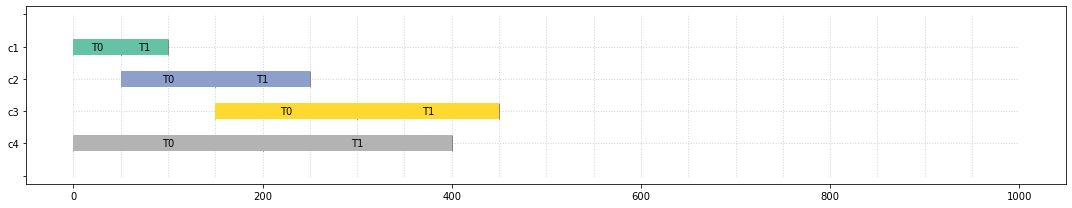

In [5]:
from docplex.cp.model import *

NB_HOUSES = 2
DEADLINE = 999
WORKERS = ['c1', 'c2', 'c3', 'c4']
NB_WORKERS = len(WORKERS)

# List of tasks to be executed for each house
TASKS = {
  't1'   : (50,  [2, 1, 1, 0],  1),
  't2'   : (100, [1, 2, 0, 1],  2),
  't3'   : (150, [1, 0, 2, 1],  3),
  't4'   : (200, [0, 1, 1, 2],  4)
}

# Tasks precedence constraints (each tuple (X, Y) means X ends before start of Y)
PRECEDENCES = [
  ('t1',   't2'),
  ('t2',   't3'),
]

#-----------------------------------------------------------------------------
# Build the model
#-----------------------------------------------------------------------------

# Create model
mdl = CpoModel()

# Initialize model variable sets
total_skill = 0                                 # Expression computing total of skills
worker_tasks = [[] for w in range(NB_WORKERS)]  # Tasks (interval variables) assigned to a each worker

# Utility function
def make_house(loc, deadline):
    ''' Create model elements corresponding to the building of a house
    loc      Identification of house location
    deadline Deadline for finishing the house
    '''

    # Create interval variable for each task for this house
    tasks = {t: interval_var(size=TASKS[t][0], end=(0, deadline),
                             name='H{}-{}'.format(loc,t)) for t in TASKS}

    # Add precedence constraints
    mdl.add(end_before_start(tasks[p], tasks[s]) for p,s in PRECEDENCES)

    # Allocate tasks to workers
    global total_skill
    allocs = { (t,w) : interval_var(optional=True, name='H{}-{}-{}'.format(loc, t, w))
               for t in TASKS for w in range(NB_WORKERS) if TASKS[t][1][w] > 0 }
    total_skill += sum((TASKS[t][1][w] * presence_of(allocs[t,w])) for t,w in allocs)
    for t in TASKS:
        mdl.add(alternative(tasks[t], [allocs[t2,w] for t2,w in allocs if t==t2]))
    for t,w in allocs:
        worker_tasks[w].append(allocs[t,w])

    #alternative(a, b[]): This method creates an alternative constraint between
        #interval variable a and the set of interval variables in the array bs.     

# Make houses
for h in range(NB_HOUSES):
    make_house(h, DEADLINE)

# Avoid overlapping between tasks of each worker
for w in range(NB_WORKERS):
    mdl.add(no_overlap(worker_tasks[w]))

# Maximize total of skills
mdl.add(maximize(total_skill))


#-----------------------------------------------------------------------------
# Solve the model and display the result
#-----------------------------------------------------------------------------

def compact(name):
    # Example: H3-garden -> G3
    #           ^ ^
    loc, task, worker = name[1:].split('-', 2)
    # Returns color index and compacted name
    return int(TASKS[task][2]), task[0].upper() + loc

# Solve model
print('Solving model...')
res = mdl.solve()

print('Solution:')
res.print_solution()

# Draw solution
import docplex.cp.utils_visu as visu
if res and visu.is_visu_enabled():
    visu.timeline('Solution house building', 0, DEADLINE)
    for w in range(NB_WORKERS):
        visu.sequence(name=WORKERS[w])
        for t in worker_tasks[w]:
            wt = res.get_var_solution(t)
            if wt.is_present():
                visu.interval(wt, *compact(wt.get_name()))
    visu.show()
